In [52]:
#Thank you for the course and for Your work. Honestly, it was not easy for me, but in this Final Project 
#I tried as much as I can.

In [ ]:
#Data source is https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
olympics= pd.read_csv('athlete_events.csv')
noc_reg=pd.read_csv('noc_regions.csv')
olympics.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [2]:
olympics.columns
type(olympics.columns)

pandas.core.indexes.base.Index

In [3]:
olympics.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [4]:
noc_reg.columns

Index(['NOC', 'region', 'notes'], dtype='object')

In [5]:
olympics.shape

(271116, 15)

In [6]:
olympics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [7]:
olympics.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,271116.0,68248.954396,39022.286345,1.0,34643.0,68205.0,102097.25,135571.0
Age,261642.0,25.556898,6.393561,10.0,21.0,24.0,28.00,97.0
Height,210945.0,175.338970,10.518462,127.0,168.0,175.0,183.00,226.0
Weight,208241.0,70.702393,14.348020,25.0,60.0,70.0,79.00,214.0
Year,271116.0,1978.378480,29.877632,1896.0,1960.0,1988.0,2002.00,2016.0


In [8]:
olympics.describe(include=[np.object,pd.Categorical]).T

,count,unique,top,freq
Name,271116,134732,Robert Tait McKenzie,58
Sex,271116,2,M,196594
Team,271116,1184,United States,17847
NOC,271116,230,USA,18853
Games,271116,51,2000 Summer,13821
Season,271116,2,Summer,222552
City,271116,42,London,22426
Sport,271116,66,Athletics,38624
Event,271116,765,Football Men's Football,5733
Medal,39783,3,Gold,13372


In [9]:
teams=olympics['Team'].unique()
teams

array(['China', 'Denmark', 'Denmark/Sweden', ..., 'Solos Carex',
       'Dow Jones', 'Digby'], dtype=object)

In [11]:
len(teams)

1184

In [12]:
noc_reg_dict=dict(zip(noc_reg['NOC'],noc_reg['region']))
noc_reg_dict #Made dictionary to raplace abbreviation NOC with "Region"

{'AFG': 'Afghanistan',
 'AHO': 'Curacao',
 'ALB': 'Albania',
 'ALG': 'Algeria',
 'AND': 'Andorra',
 'ANG': 'Angola',
 'ANT': 'Antigua',
 'ANZ': 'Australia',
 'ARG': 'Argentina',
 'ARM': 'Armenia',
 'ARU': 'Aruba',
 'ASA': 'American Samoa',
 'AUS': 'Australia',
 'AUT': 'Austria',
 'AZE': 'Azerbaijan',
 'BAH': 'Bahamas',
 'BAN': 'Bangladesh',
 'BAR': 'Barbados',
 'BDI': 'Burundi',
 'BEL': 'Belgium',
 'BEN': 'Benin',
 'BER': 'Bermuda',
 'BHU': 'Bhutan',
 'BIH': 'Bosnia and Herzegovina',
 'BIZ': 'Belize',
 'BLR': 'Belarus',
 'BOH': 'Czech Republic',
 'BOL': 'Boliva',
 'BOT': 'Botswana',
 'BRA': 'Brazil',
 'BRN': 'Bahrain',
 'BRU': 'Brunei',
 'BUL': 'Bulgaria',
 'BUR': 'Burkina Faso',
 'CAF': 'Central African Republic',
 'CAM': 'Cambodia',
 'CAN': 'Canada',
 'CAY': 'Cayman Islands',
 'CGO': 'Republic of Congo',
 'CHA': 'Chad',
 'CHI': 'Chile',
 'CHN': 'China',
 'CIV': 'Ivory Coast',
 'CMR': 'Cameroon',
 'COD': 'Democratic Republic of the Congo',
 'COK': 'Cook Islands',
 'COL': 'Colombia',
 

In [13]:
olympics2=olympics['NOC'].replace(noc_reg_dict)
olympics2.head()

0          China
1          China
2        Denmark
3        Denmark
4    Netherlands
Name: NOC, dtype: object

In [14]:
olympics3=olympics['NOC'].map(noc_reg_dict)
olympics3.sample()

96125    Germany
Name: NOC, dtype: object

In [15]:
olympics['NOC']=olympics3
olympics[15:30] #Took a long time to find solution for maping data

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
15,6,Per Knut Aaland,M,33.0,188.0,75.0,United States,USA,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 30 kilometres,NaN
16,6,Per Knut Aaland,M,33.0,188.0,75.0,United States,USA,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 10/15 kilometres Pu...,NaN
17,6,Per Knut Aaland,M,33.0,188.0,75.0,United States,USA,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 4 x 10 kilometres R...,NaN
18,7,John Aalberg,M,31.0,183.0,72.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN
19,7,John Aalberg,M,31.0,183.0,72.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 50 kilometres,NaN
20,7,John Aalberg,M,31.0,183.0,72.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10/15 kilometres Pu...,NaN
21,7,John Aalberg,M,31.0,183.0,72.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 4 x 10 kilometres R...,NaN
22,7,John Aalberg,M,33.0,183.0,72.0,United States,USA,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 10 kilometres,NaN
23,7,John Aalberg,M,33.0,183.0,72.0,United States,USA,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 30 kilometres,NaN
24,7,John Aalberg,M,33.0,183.0,72.0,United States,USA,1994 Winter,1994,Winter,Lillehammer,Cross Country Skiing,Cross Country Skiing Men's 10/15 kilometres Pu...,NaN


In [16]:
olympics.rename(columns={'NOC':'Region'},inplace=True)
olympics.head()

,ID,Name,Sex,Age,Height,Weight,Team,Region,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,China,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,China,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,Denmark,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,Denmark,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,Netherlands,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [17]:
olympics_new=olympics[olympics['Year']>=1991]
olympics_new.head() #Bit more analysis starting from Year 1991

,ID,Name,Sex,Age,Height,Weight,Team,Region,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,China,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,China,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,Netherlands,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,Netherlands,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,Netherlands,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN


In [18]:
sorted(olympics_new['Games'].unique())

['1992 Summer',
 '1992 Winter',
 '1994 Winter',
 '1996 Summer',
 '1998 Winter',
 '2000 Summer',
 '2002 Winter',
 '2004 Summer',
 '2006 Winter',
 '2008 Summer',
 '2010 Winter',
 '2012 Summer',
 '2014 Winter',
 '2016 Summer']

In [19]:
olympics_new.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,122216.0,68918.618454,39137.352406,1.0,35437.0,69121.0,102672.0,135571.0
Age,122157.0,25.471238,5.395603,11.0,22.0,25.0,28.0,71.0
Height,116188.0,175.821591,10.901634,133.0,168.0,176.0,183.0,226.0
Weight,115753.0,71.101126,15.152324,28.0,60.0,70.0,80.0,214.0
Year,122216.0,2003.854209,7.889321,1992.0,1996.0,2004.0,2012.0,2016.0


In [20]:
olympics_new.describe(include=[np.object,pd.Categorical]).T

,count,unique,top,freq
Name,122216,61034,Yordan Yovchev Yovchev,30
Sex,122216,2,M,73501
Team,122216,364,United States,7020
Region,121976,205,USA,7335
Games,122216,14,2000 Summer,13821
Season,122216,2,Summer,94231
City,122216,14,Sydney,13821
Sport,122216,51,Athletics,16113
Event,122216,467,Ice Hockey Men's Ice Hockey,1980
Medal,16781,3,Bronze,5753


In [54]:
participants=olympics_new['ID'].unique()
len(participants) #There were 61334 athlets who took part in Olymic games starting from 1992.

61334

In [55]:
ol1992_sum=olympics_new[olympics_new['Games']=='1992 Summer']
ol1992_sum.head()

,ID,Name,Sex,Age,Height,Weight,Team,Region,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,China,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
96,33,Mika Lauri Aarnikka,M,24.0,187.0,76.0,Finland,Finland,1992 Summer,1992,Summer,Barcelona,Sailing,Sailing Men's Two Person Dinghy,NaN
118,43,Morten Gjerdrum Aasen,M,34.0,185.0,75.0,Norway,Norway,1992 Summer,1992,Summer,Barcelona,Equestrianism,"Equestrianism Mixed Jumping, Individual",NaN
137,50,Arvi Aavik,M,22.0,185.0,106.0,Estonia,Estonia,1992 Summer,1992,Summer,Barcelona,Wrestling,"Wrestling Men's Heavyweight, Freestyle",NaN
160,64,M'Bairo Abakar,M,31.0,NaN,NaN,Chad,Chad,1992 Summer,1992,Summer,Barcelona,Judo,Judo Men's Half-Middleweight,NaN


In [56]:
participants1992=ol1992_sum['ID'].unique()
len(participants1992) #9386 athletes took part in 1992 Summer Olympic games 

9386

In [23]:
olymp_med=olympics_new.groupby(['Games','Region','Medal'])['Medal'].count().reset_index(name='Medal count')
olymp_med #Grouping by Games, Regions andMedals wanted to count all Medals Region got in Games, but it took a VERY long time to write correct code for this.
#And still Iam not sure the result is correct!!!

,Games,Region,Medal,Medal count
0,1992 Summer,Algeria,Bronze,1
1,1992 Summer,Algeria,Gold,1
2,1992 Summer,Argentina,Bronze,2
3,1992 Summer,Australia,Bronze,16
4,1992 Summer,Australia,Gold,14
...,...,...,...,...
1607,2016 Summer,Uzbekistan,Silver,2
1608,2016 Summer,Venezuela,Bronze,2
1609,2016 Summer,Venezuela,Silver,1
1610,2016 Summer,Vietnam,Gold,1


In [24]:
pip install pandas_bokeh 

Note: you may need to restart the kernel to use updated packages.


In [25]:
import pandas_bokeh

In [26]:
pandas_bokeh.output_notebook

<function pandas_bokeh.base.output_notebook(notebook_type='auto', **kwargs)>

In [27]:
olymp1992_sum=olymp_med[olymp_med['Games']=='1992 Summer']
olymp1992_sum.head(10)

,Games,Region,Medal,Medal count
0,1992 Summer,Algeria,Bronze,1
1,1992 Summer,Algeria,Gold,1
2,1992 Summer,Argentina,Bronze,2
3,1992 Summer,Australia,Bronze,16
4,1992 Summer,Australia,Gold,14
5,1992 Summer,Australia,Silver,27
6,1992 Summer,Austria,Silver,6
7,1992 Summer,Bahamas,Bronze,1
8,1992 Summer,Belgium,Bronze,2
9,1992 Summer,Belgium,Silver,1


In [28]:
top1992=olymp1992_sum.groupby('Region')['Medal count'].sum().nlargest(10).reset_index(name='Medals total')
top1992

,Region,Medals total
0,USA,224
1,Russia,220
2,Germany,198
3,China,82
4,Cuba,69
5,Spain,69
6,Australia,57
7,France,57
8,Romania,53
9,UK,50


In [57]:
top1992['Medals total'].plot_bokeh(kind='bar', xlabel='Region',ylabel='Medals total',title='Top countries by medal count')

Figure(id='1201', ...)

In [ ]:
#Read about Bokeh lybrary, but ir didn't work correctly, but I couldn't find the reason why (Indexes are on x-axis,not the Region names)
#So there is other variant of plot from Matplotlib

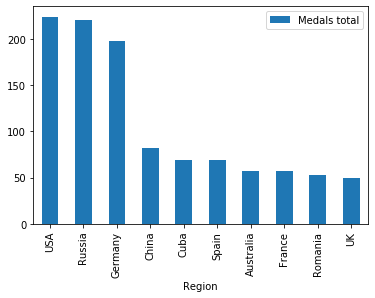

In [50]:
top1992.plot(x ='Region', y='Medals total', kind = 'bar')
plt.show()

In [30]:
cities=olympics_new['City'].unique()
ol_cit=list(cities)
ol_cit

['Barcelona',
 'London',
 'Albertville',
 'Lillehammer',
 'Salt Lake City',
 'Sydney',
 'Atlanta',
 'Sochi',
 'Nagano',
 'Torino',
 'Beijing',
 'Rio de Janeiro',
 'Athina',
 'Vancouver']

In [31]:
import folium
from folium import plugins
import os
import json

In [ ]:
#Wanted to put all Olympic cities (starting from 1992) on map but it didn't work 

In [32]:
world=folium.Map()
world

In [33]:
with open('cities.json',encoding="utf-8") as file_in:
    mydata = json.loads(file_in.read())

In [34]:
df = pd.read_json('cities.json', encoding="UTF-8")

In [35]:
df.index = df['name']
df.head()

,country,name,lat,lng
name,,,,
Sant Julià de Lòria,AD,Sant Julià de Lòria,42.46372,1.49129
Pas de la Casa,AD,Pas de la Casa,42.54277,1.73361
Ordino,AD,Ordino,42.55623,1.53319
les Escaldes,AD,les Escaldes,42.50729,1.53414
la Massana,AD,la Massana,42.54499,1.51483


In [36]:
'London' in df.name

True

In [37]:
city_list=['Barcelona',
 'London',
 'Albertville',
 'Lillehammer',
 'Salt Lake City',
 'Sydney',
 'Atlanta',
 'Sochi',
 'Nagano',
 'Torino',
 'Beijing',
 'Rio de Janeiro',
 'Athina',
 'Vancouver']
filtered_df = df[df['name'].isin(city_list)]
filtered_df

,country,name,lat,lng
name,,,,
Sydney,AU,Sydney,-33.86785,151.20732
Rio de Janeiro,BR,Rio de Janeiro,-22.90642,-43.18223
London,CA,London,42.98339,-81.23304
Vancouver,CA,Vancouver,49.24966,-123.11934
Sydney,CA,Sydney,46.13510,-60.18310
Beijing,CN,Beijing,39.90750,116.39723
Barcelona,ES,Barcelona,41.38879,2.15899
Albertville,FR,Albertville,45.67452,6.39061
London,GB,London,51.50853,-0.12574


In [38]:
def createCitiesMap(addToolTip=True):
    newmap = folium.Map(location=[(filtered_df.lat.max()+filtered_df.lat.min())/2, (filtered_df.lng.max()+filtered_df.lng.min())/2], zoom_start = 5)
    for index,name in filtered_df.iterrows(): # how to iterate
        if addToolTip:
            mytooltip = str(filtered_df['name'])
        else:
            mytooltip = None
    return newmap

In [39]:
olymp_cities=createCitiesMap()
olymp_cities